In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel





In [2]:
df=pd.read_csv(r"spotify dataset.csv")
df.head()

track_id                                         track_name  \
0  6f807x0ima9a1j3VPbc7VN  I Don't Care (with Justin Bieber) - Loud Luxur...   
1  0r7CVbZTWZgbTCYdfa2P31                    Memories - Dillon Francis Remix   
2  1z1Hg7Vb0AhHDiEmnDE79l                    All the Time - Don Diablo Remix   
3  75FpbthrwQmzHlBJLuGdC7                  Call You Mine - Keanu Silva Remix   
4  1e8PAfcKUYoKkxPhrHqw4x            Someone You Loved - Future Humans Remix   

       track_artist  track_popularity          track_album_id  \
0        Ed Sheeran                66  2oCs0DGTsRO98Gh5ZSl2Cx   
1          Maroon 5                67  63rPSO264uRjW1X5E6cWv6   
2      Zara Larsson                70  1HoSmj2eLcsrR0vE9gThr4   
3  The Chainsmokers                60  1nqYsOef1yKKuGOVchbsk6   
4     Lewis Capaldi                69  7m7vv9wlQ4i0LFuJiE2zsQ   

                                    track_album_name track_album_release_date  \
0  I Don't Care (with Justin Bieber) [Loud Luxury...               2019-06-14   
1                    Memories (Dillon Francis Remix)               2019-12-13   
2                    All the Time (Don Diablo Remix)               2019-07-05   
3                        Call You Mine - The Remixes               2019-07-19   
4            Someone You Loved (Future Humans Remix)               2019-03-05   

  playlist_name             playlist_id playlist_genre  ... key  loudness  \
0     Pop Remix  37i9dQZF1DXcZDD7cfEKhW            pop  ...   6    -2.634   
1     Pop Remix  37i9dQZF1DXcZDD7cfEKhW            pop  ...  11    -4.969   
2     Pop Remix  37i9dQZF1DXcZDD7cfEKhW            pop  ...   1    -3.432   
3     Pop Remix  37i9dQZF1DXcZDD7cfEKhW            pop  ...   7    -3.778   
4     Pop Remix  37i9dQZF1DXcZDD7cfEKhW            pop  ...   1    -4.672   

   mode  speechiness  acousticness  instrumentalness  liveness  valence  \
0     1       0.0583        0.1020          0.000000    0.0653    0.518   
1     1       0.0373        0.0724          0.004210    0.3570    0.693   
2     0       0.0742        0.0794          0.000023    0.1100    0.613   
3     1       0.1020        0.0287          0.000009    0.2040    0.277   
4     1       0.0359        0.0803          0.000000    0.0833    0.725   

     tempo  duration_ms  
0  122.036       194754  
1   99.972       162600  
2  124.008       176616  
3  121.956       169093  
4  123.976       189052  

[5 rows x 23 columns]

In [3]:
df.tail()

track_id                            track_name  \
32828  7bxnKAamR3snQ1VGLuVfC1  City Of Lights - Official Radio Edit   
32829  5Aevni09Em4575077nkWHz   Closer - Sultan & Ned Shepard Remix   
32830  7ImMqPP3Q1yfUHvsdn7wEo          Sweet Surrender - Radio Edit   
32831  2m69mhnfQ1Oq6lGtXuYhgX        Only For You - Maor Levi Remix   
32832  29zWqhca3zt5NsckZqDf6c                Typhoon - Original Mix   

         track_artist  track_popularity          track_album_id  \
32828    Lush & Simon                42  2azRoBBWEEEYhqV6sb7JrT   
32829  Tegan and Sara                20  6kD6KLxj7s8eCE3ABvAyf5   
32830     Starkillers                14  0ltWNSY9JgxoIZO4VzuCa6   
32831          Mat Zo                15  1fGrOkHnHJcStl14zNx8Jy   
32832    Julian Calor                27  0X3mUOm6MhxR7PzxG95rAo   

                   track_album_name track_album_release_date    playlist_name  \
32828    City Of Lights (Vocal Mix)               2014-04-28  ♥ EDM LOVE 2020   
32829                Closer Remixed               2013-03-08  ♥ EDM LOVE 2020   
32830  Sweet Surrender (Radio Edit)               2014-04-21  ♥ EDM LOVE 2020   
32831        Only For You (Remixes)               2014-01-01  ♥ EDM LOVE 2020   
32832                 Typhoon/Storm               2014-03-03  ♥ EDM LOVE 2020   

                  playlist_id playlist_genre  ... key  loudness  mode  \
32828  6jI1gFr6ANFtT8MmTvA2Ux            edm  ...   2    -1.814     1   
32829  6jI1gFr6ANFtT8MmTvA2Ux            edm  ...   0    -4.462     1   
32830  6jI1gFr6ANFtT8MmTvA2Ux            edm  ...   6    -4.899     0   
32831  6jI1gFr6ANFtT8MmTvA2Ux            edm  ...   2    -3.361     1   
32832  6jI1gFr6ANFtT8MmTvA2Ux            edm  ...   5    -4.571     0   

       speechiness  acousticness  instrumentalness  liveness  valence  \
32828       0.0936      0.076600          0.000000    0.0668   0.2100   
32829       0.0420      0.001710          0.004270    0.3750   0.4000   
32830       0.0481      0.108000          0.000001    0.1500   0.4360   
32831       0.1090      0.007920          0.127000    0.3430   0.3080   
32832       0.0385      0.000133          0.341000    0.7420   0.0894   

         tempo  duration_ms  
32828  128.170       204375  
32829  128.041       353120  
32830  127.989       210112  
32831  128.008       367432  
32832  127.984       337500  

[5 rows x 23 columns]

Data Preprocessing

In [4]:
df.describe()

track_popularity  danceability        energy           key  \
count      32833.000000  32833.000000  32833.000000  32833.000000   
mean          42.477081      0.654850      0.698619      5.374471   
std           24.984074      0.145085      0.180910      3.611657   
min            0.000000      0.000000      0.000175      0.000000   
25%           24.000000      0.563000      0.581000      2.000000   
50%           45.000000      0.672000      0.721000      6.000000   
75%           62.000000      0.761000      0.840000      9.000000   
max          100.000000      0.983000      1.000000     11.000000   

           loudness          mode   speechiness  acousticness  \
count  32833.000000  32833.000000  32833.000000  32833.000000   
mean      -6.719499      0.565711      0.107068      0.175334   
std        2.988436      0.495671      0.101314      0.219633   
min      -46.448000      0.000000      0.000000      0.000000   
25%       -8.171000      0.000000      0.041000      0.015100   
50%       -6.166000      1.000000      0.062500      0.080400   
75%       -4.645000      1.000000      0.132000      0.255000   
max        1.275000      1.000000      0.918000      0.994000   

       instrumentalness      liveness       valence         tempo  \
count      32833.000000  32833.000000  32833.000000  32833.000000   
mean           0.084747      0.190176      0.510561    120.881132   
std            0.224230      0.154317      0.233146     26.903624   
min            0.000000      0.000000      0.000000      0.000000   
25%            0.000000      0.092700      0.331000     99.960000   
50%            0.000016      0.127000      0.512000    121.984000   
75%            0.004830      0.248000      0.693000    133.918000   
max            0.994000      0.996000      0.991000    239.440000   

         duration_ms  
count   32833.000000  
mean   225799.811622  
std     59834.006182  
min      4000.000000  
25%    187819.000000  
50%    216000.000000  
75%    253585.000000  
max    517810.000000

In [5]:
df['track_popularity'].describe

<bound method NDFrame.describe of 0        66
1        67
2        70
3        60
4        69
         ..
32828    42
32829    20
32830    14
32831    15
32832    27
Name: track_popularity, Length: 32833, dtype: int64>

In [6]:
df.isnull().sum()

track_id                    0
track_name                  5
track_artist                5
track_popularity            0
track_album_id              0
track_album_name            5
track_album_release_date    0
playlist_name               0
playlist_id                 0
playlist_genre              0
playlist_subgenre           0
danceability                0
energy                      0
key                         0
loudness                    0
mode                        0
speechiness                 0
acousticness                0
instrumentalness            0
liveness                    0
valence                     0
tempo                       0
duration_ms                 0
dtype: int64

In [7]:
df.drop_duplicates(inplace=True)
df.dropna(inplace=True)


 Data Analysis and Visualizations

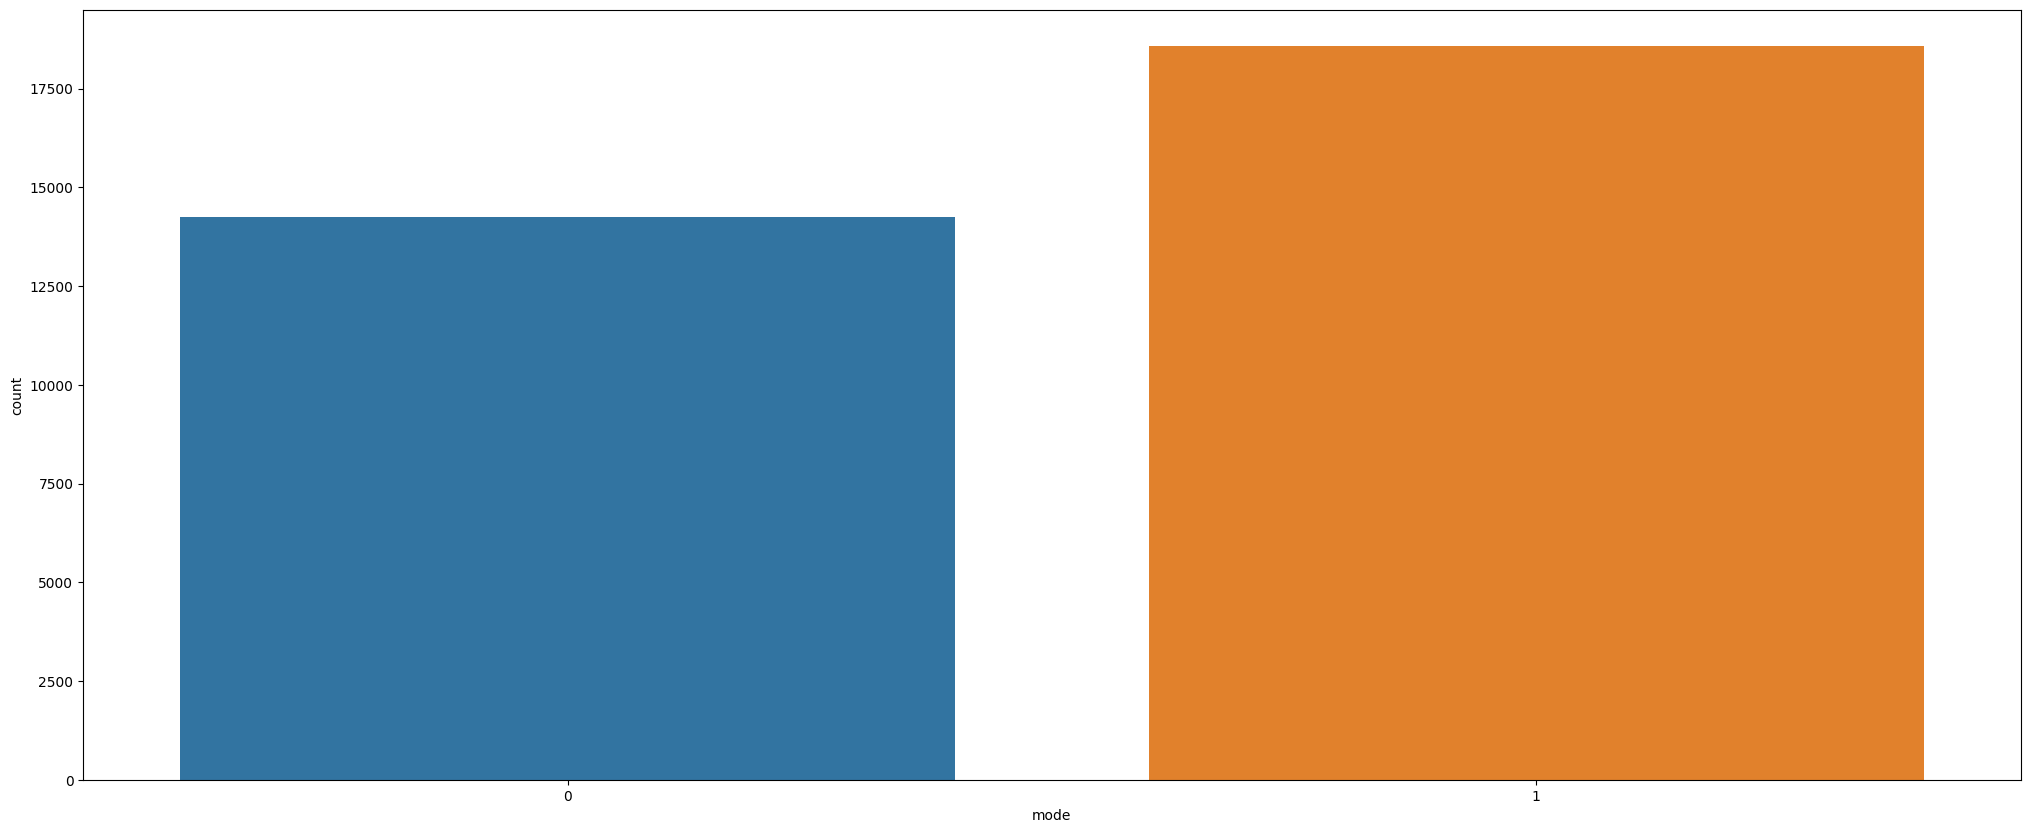

In [8]:
plt.subplots(figsize=(25,10))  
sns.countplot(data=df, x="mode")
plt.show()

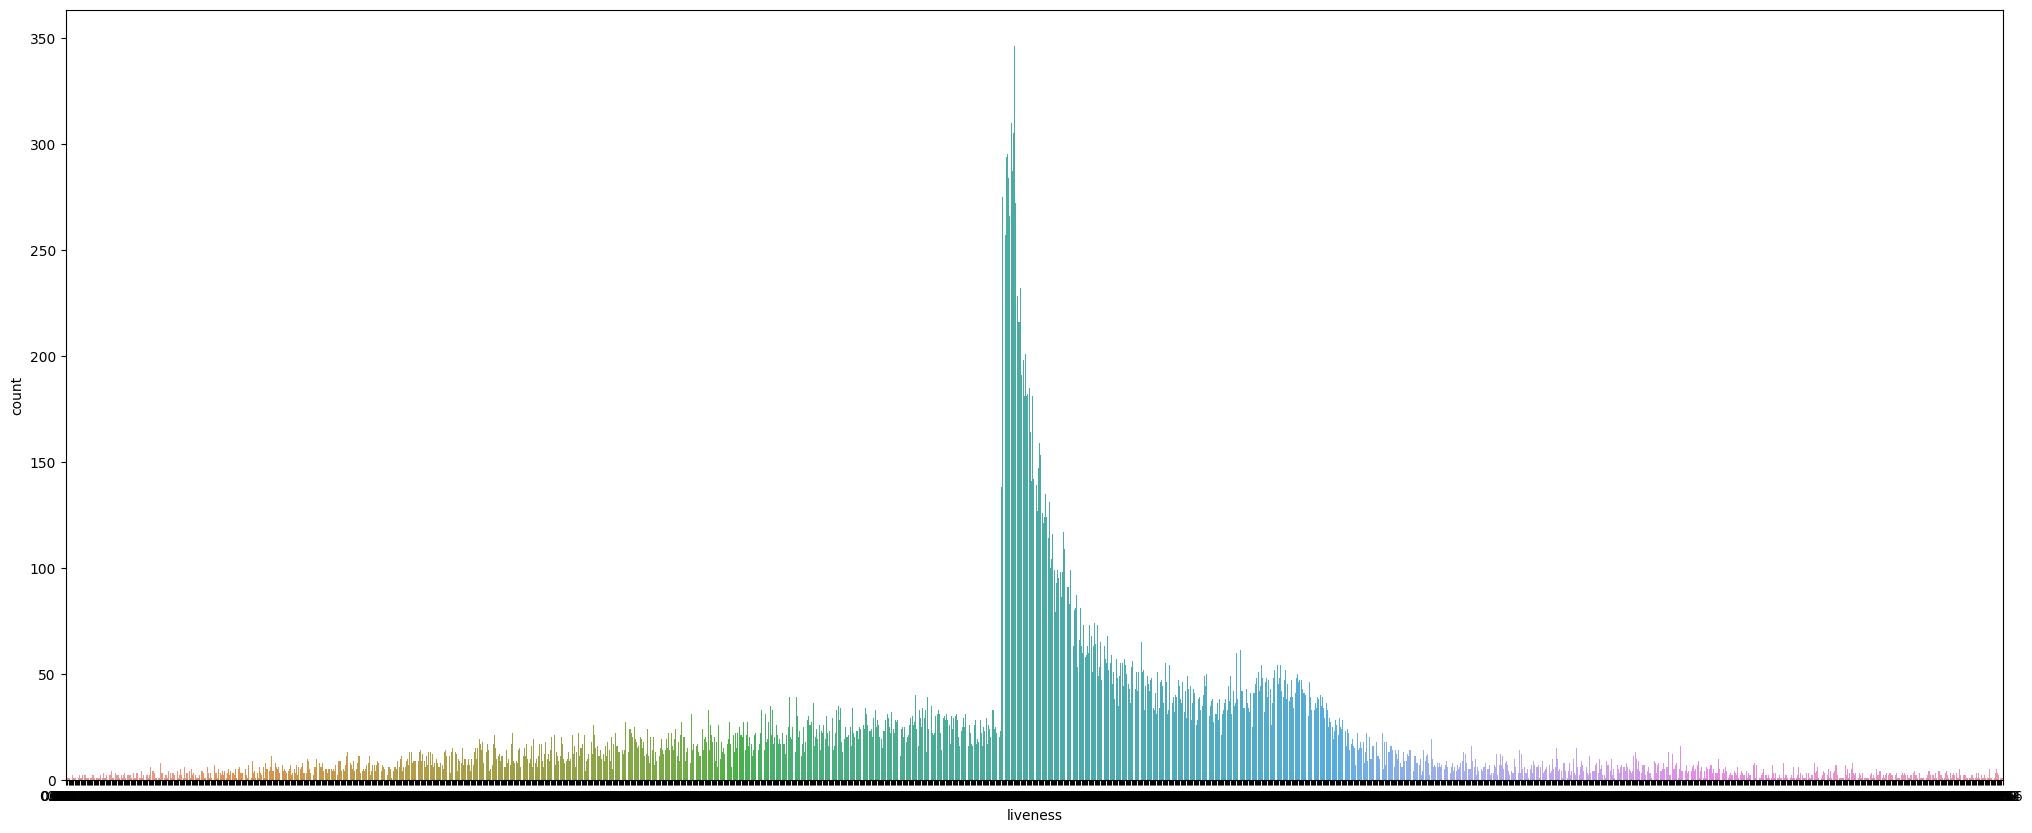

In [9]:
plt.subplots(figsize=(25,10))  
sns.countplot(data=df, x="liveness")
plt.show()

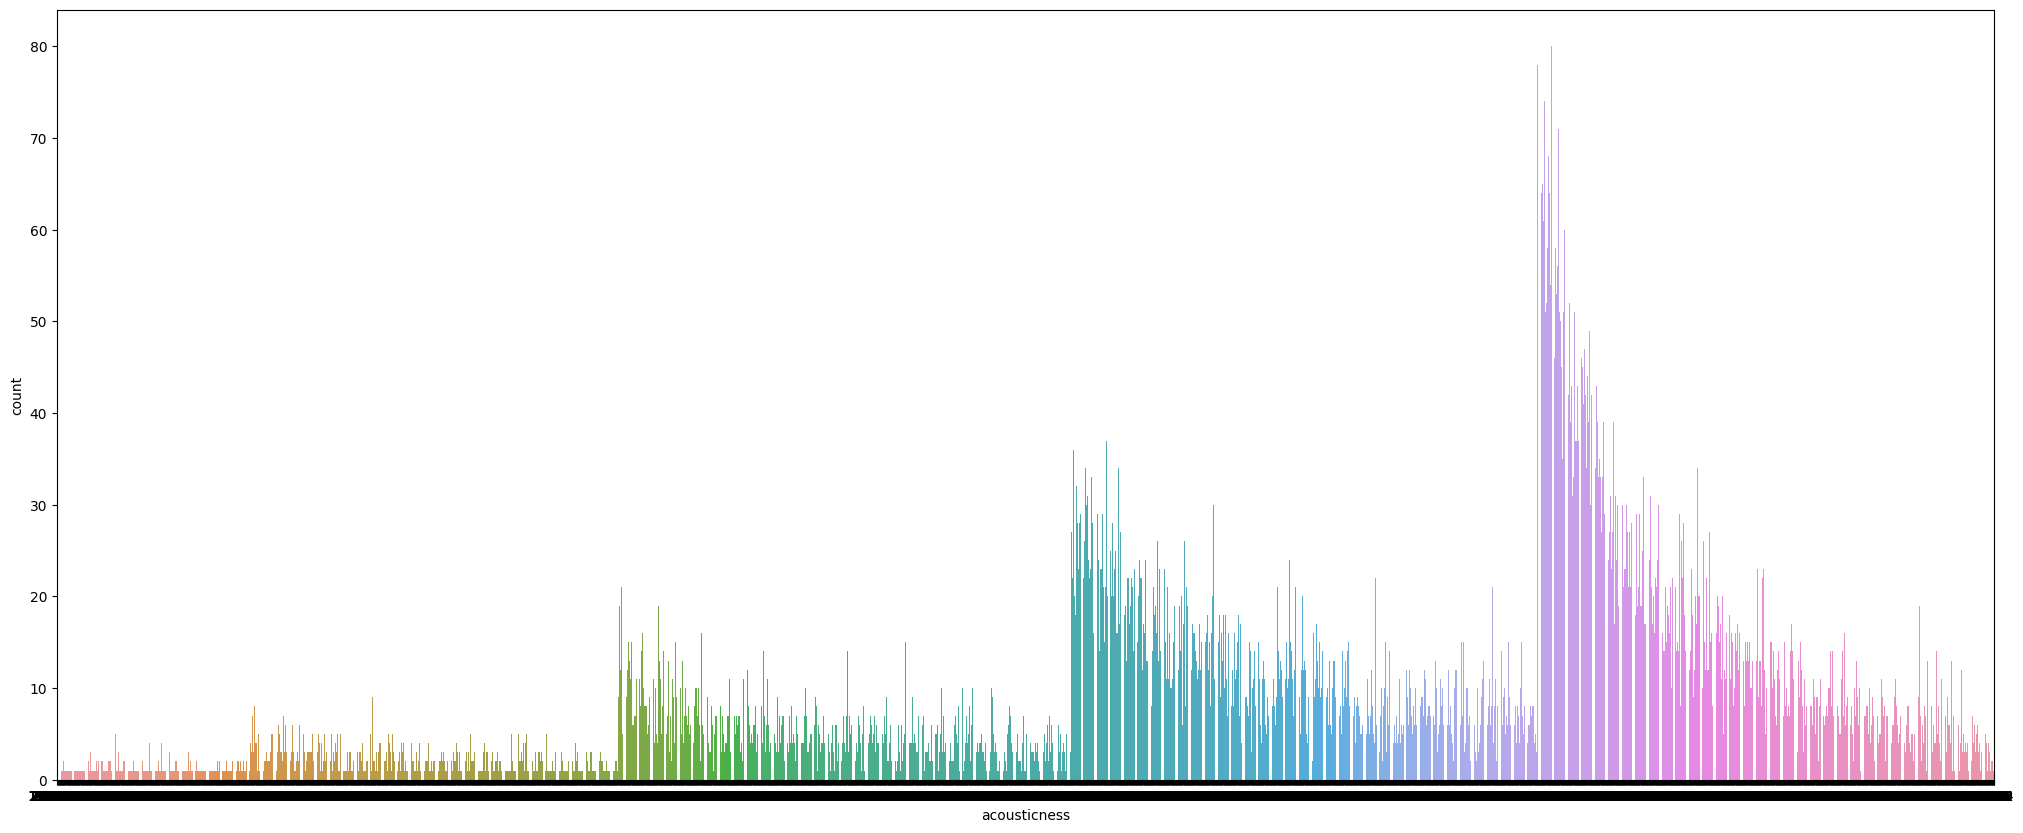

In [10]:
plt.subplots(figsize=(25,10))  
sns.countplot(data=df, x="acousticness")
plt.show()

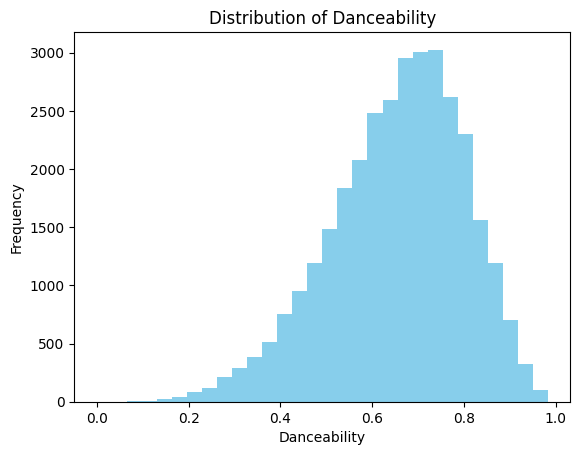

In [11]:
plt.hist(df['danceability'], bins=30, color='skyblue')
plt.xlabel('Danceability')
plt.ylabel('Frequency')
plt.title('Distribution of Danceability')
plt.show()

c:\Users\bazzu\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


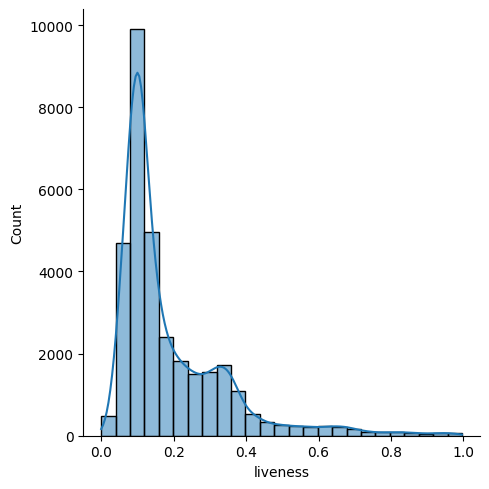

In [12]:
sns.displot(data=df, x="liveness", kde=True, bins=25)
plt.show()

c:\Users\bazzu\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


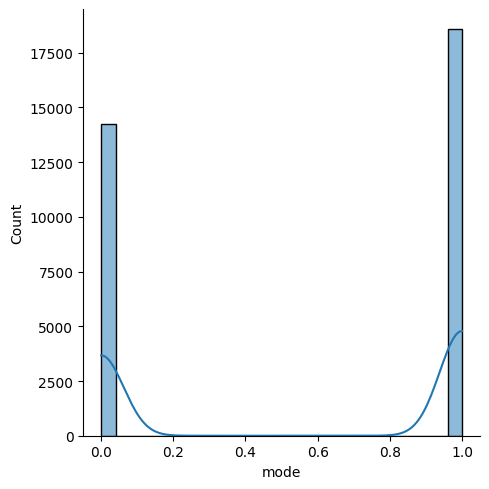

In [13]:
sns.displot(data=df, x="mode", kde=True, bins=25)
plt.show()

c:\Users\bazzu\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


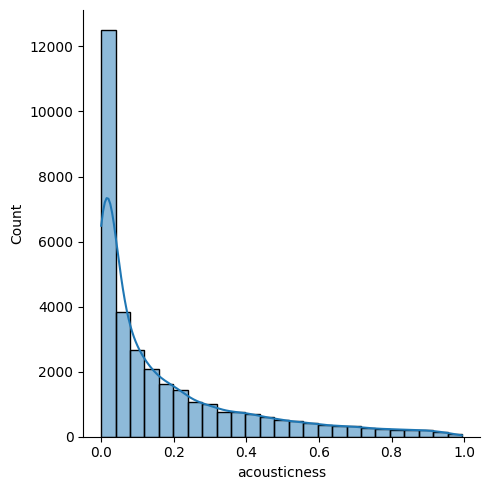

In [14]:
sns.displot(data=df, x="acousticness", kde=True, bins=25)
plt.show()

c:\Users\bazzu\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


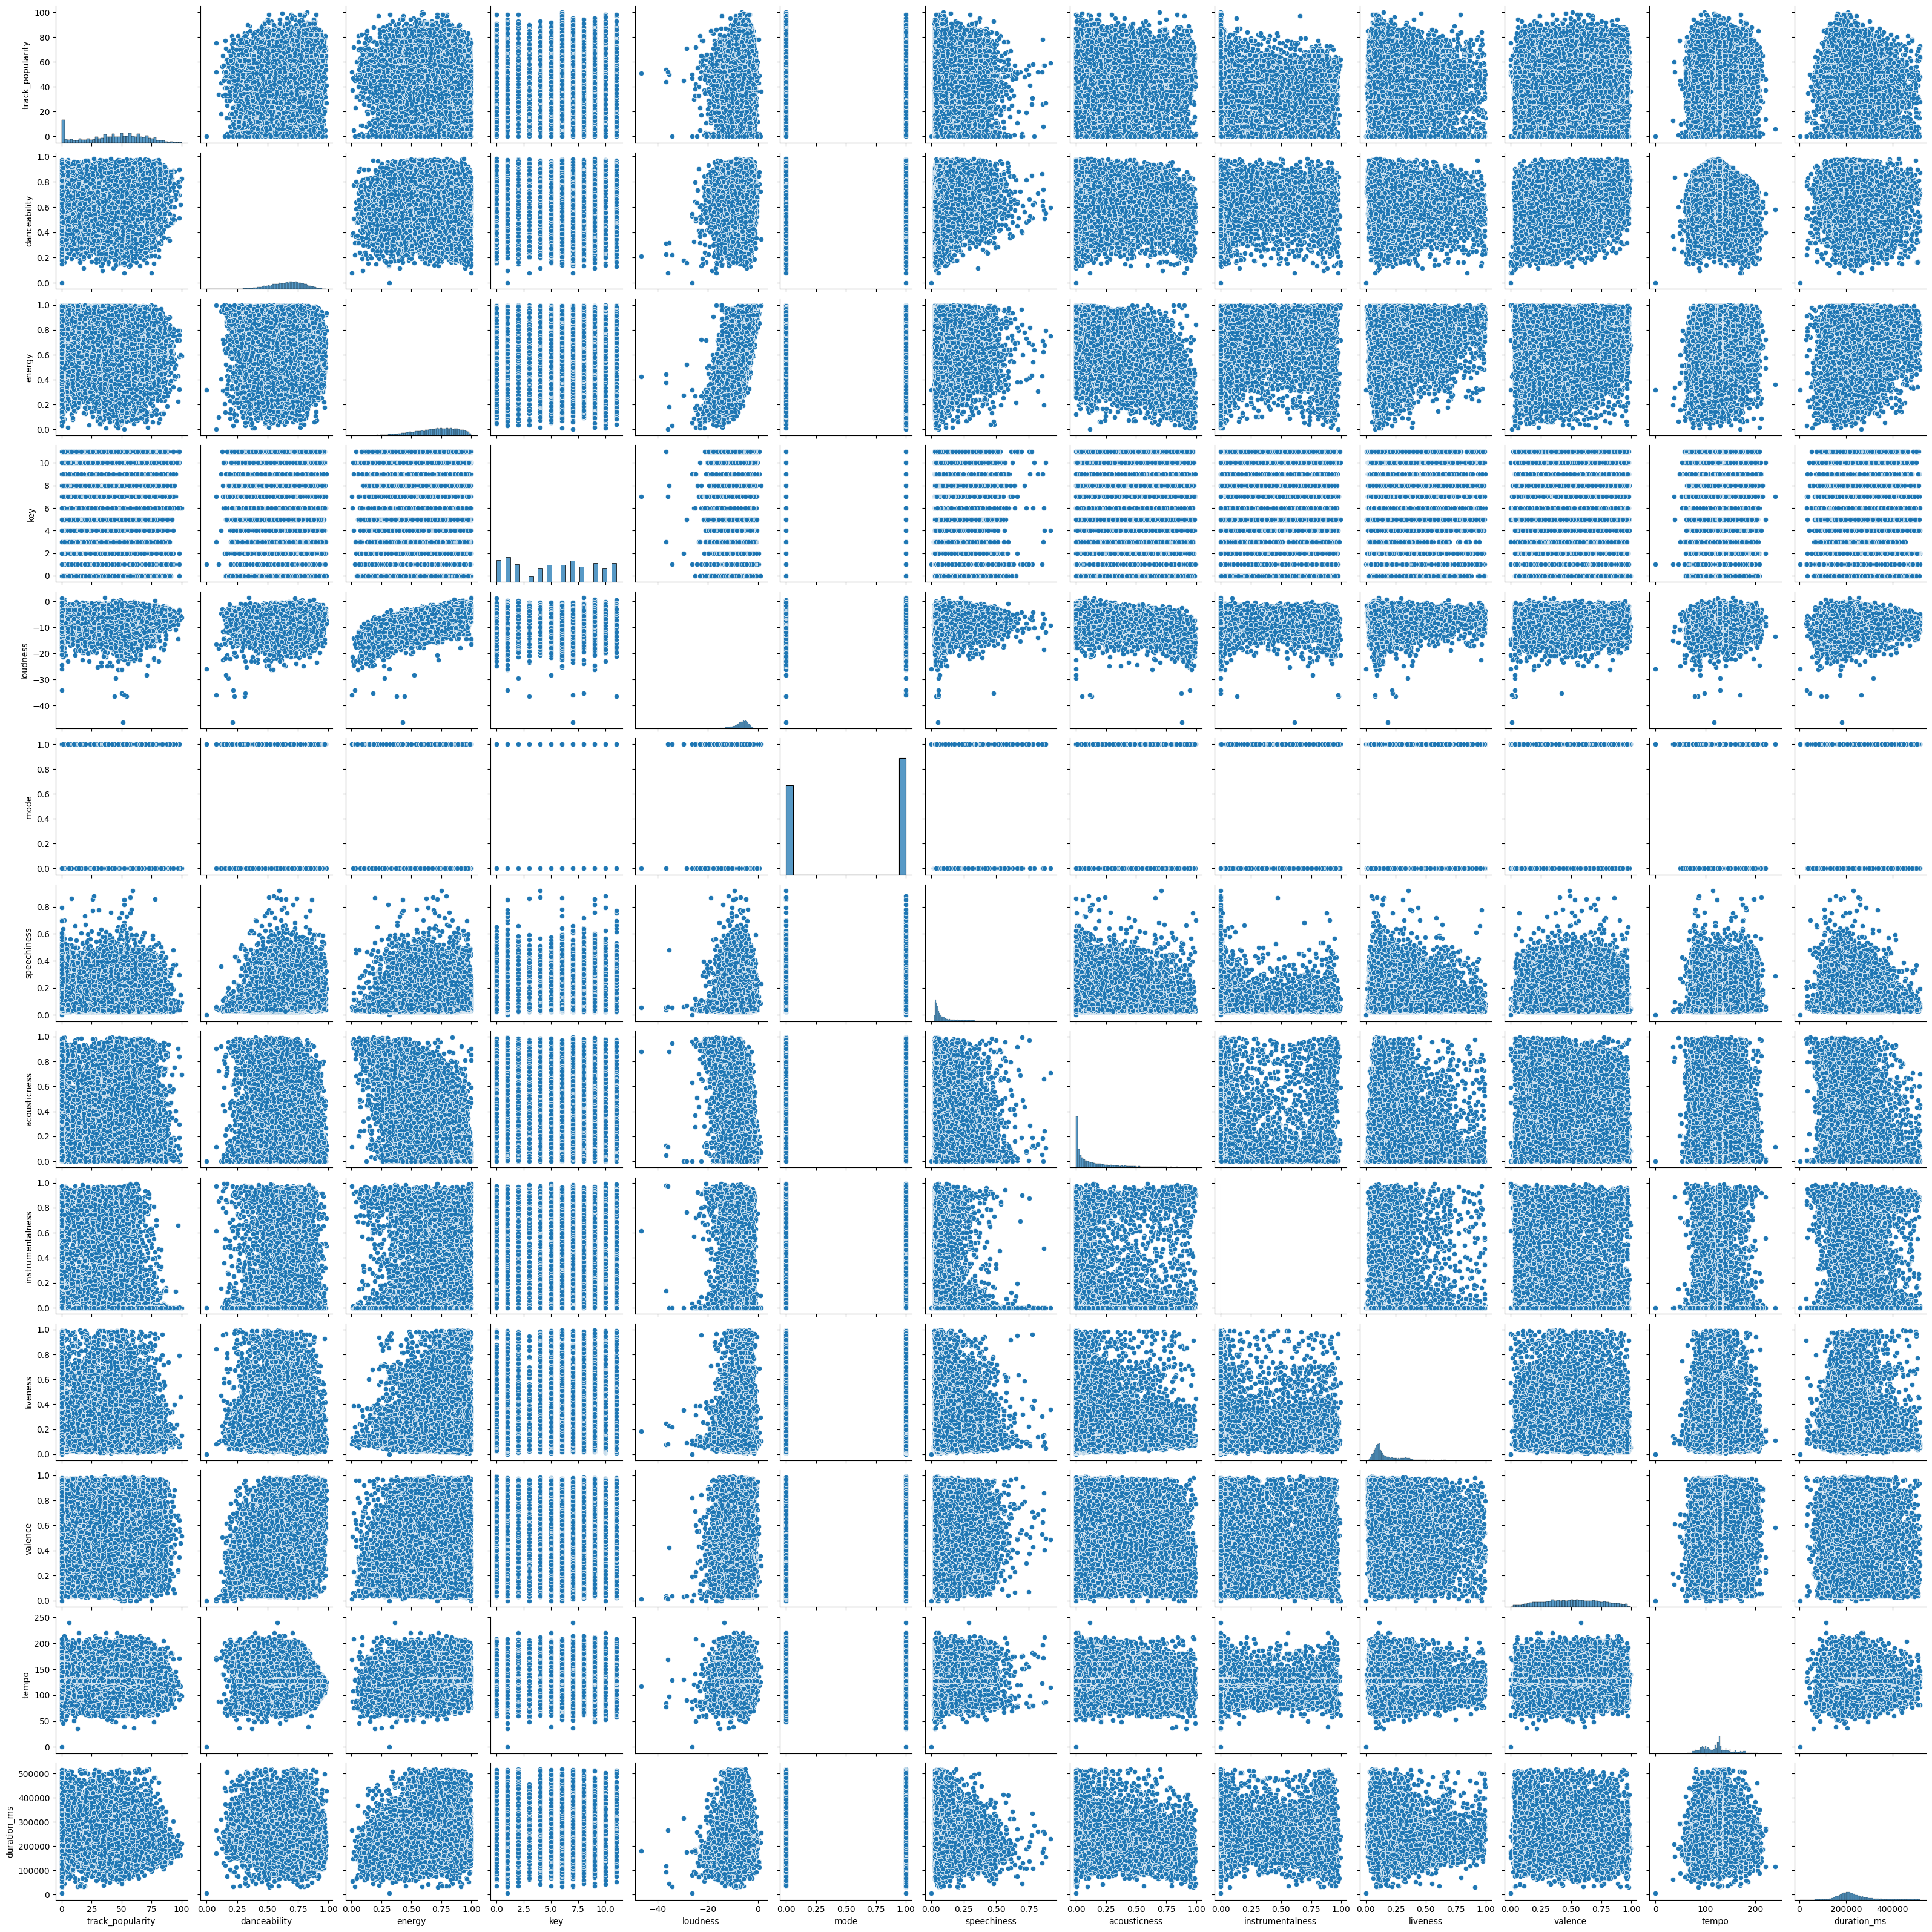

In [15]:
sns.pairplot(df) 
plt.show()

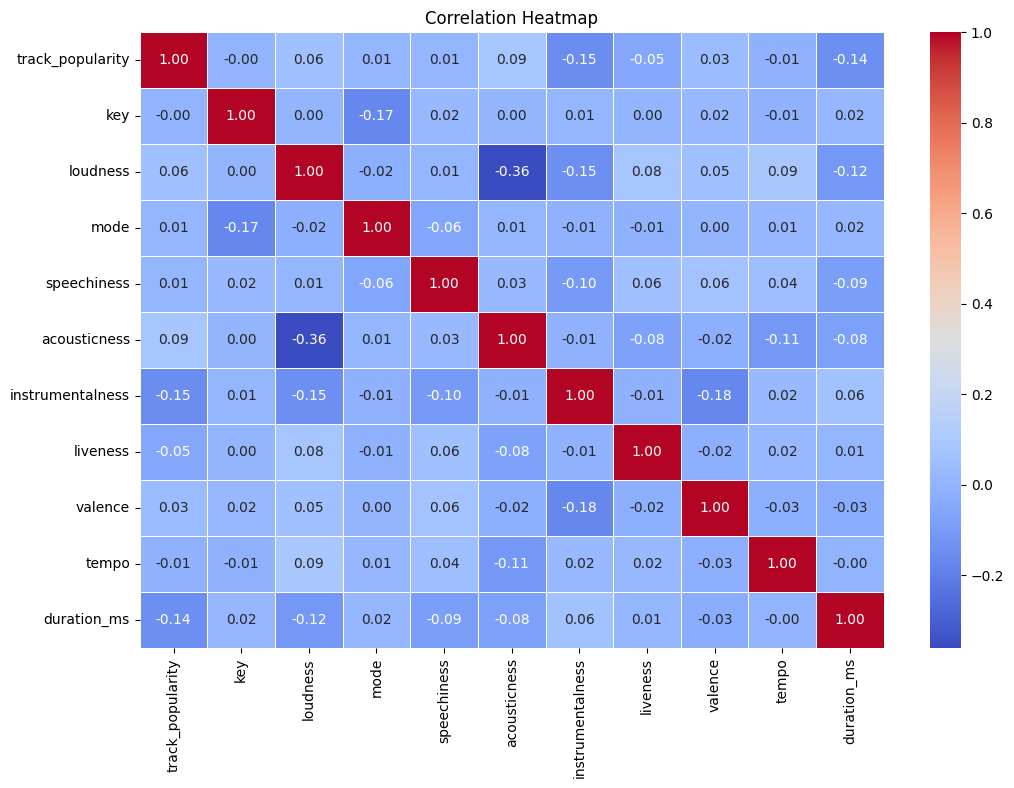

In [16]:
# Select the numeric columns for the heatmap
numeric_columns_to_include = [
    'track_popularity',
    'key',
    'loudness',
    'mode',
    'speechiness',
    'acousticness',
    'instrumentalness',
    'liveness',
    'valence',
    'tempo',
    'duration_ms'
]

# Filter the DataFrame to include only numeric columns
numeric_df = df[numeric_columns_to_include]

# Calculate the correlation matrix for numeric columns
correlation_matrix = numeric_df.corr()

import seaborn as sns
import matplotlib.pyplot as plt

# Set the size of the heatmap
plt.figure(figsize=(12, 8))

# Create the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

# Set the title
plt.title('Correlation Heatmap')

# Show the plot
plt.show()


c:\Users\bazzu\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


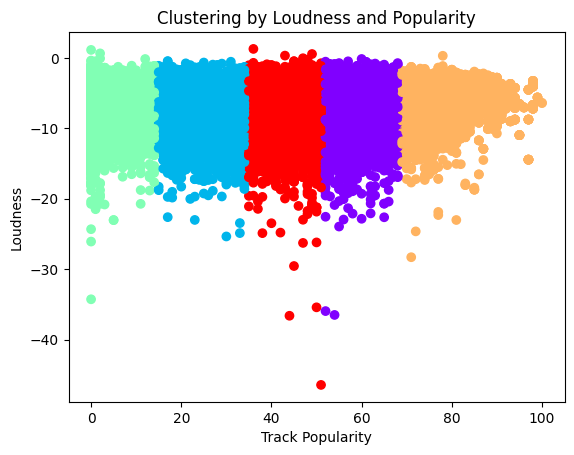

In [17]:

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


# Select numeric columns for clustering
numeric_columns_to_include = ['track_popularity', 'loudness']
numeric_df = df[numeric_columns_to_include]

# Choose the number of clusters (you can adjust this)
num_clusters = 5

# Perform K-Means clustering
kmeans = KMeans(n_clusters=num_clusters)
df['cluster'] = kmeans.fit_predict(numeric_df)

# Plot the clusters
plt.scatter(df['track_popularity'], df['loudness'], c=df['cluster'], cmap='rainbow')
plt.xlabel('Track Popularity')
plt.ylabel('Loudness')
plt.title('Clustering by Loudness and Popularity')
plt.show()


In [18]:
df.columns

Index(['track_id', 'track_name', 'track_artist', 'track_popularity',
       'track_album_id', 'track_album_name', 'track_album_release_date',
       'playlist_name', 'playlist_id', 'playlist_genre', 'playlist_subgenre',
       'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_ms', 'cluster'],
      dtype='object')

c:\Users\bazzu\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


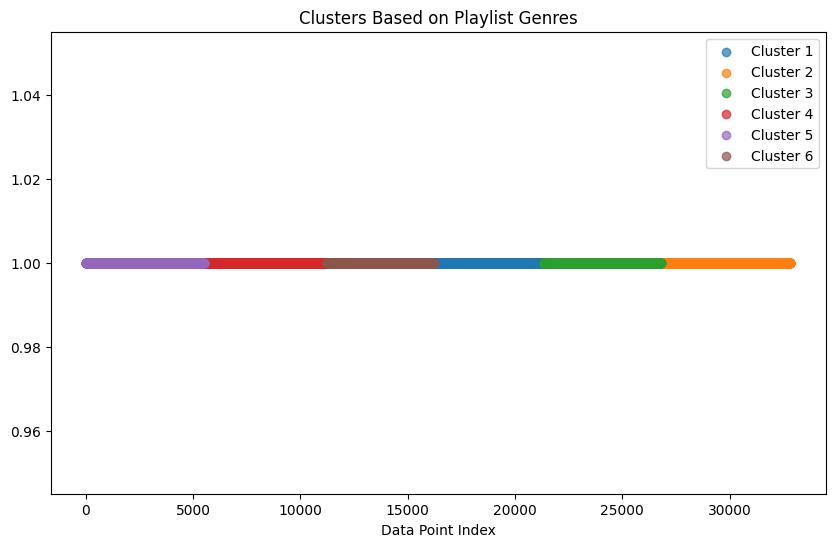

In [19]:



# Specify the column you want to use for clustering
X = df['playlist_genre']

# Initialize the TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=1000, stop_words='english')

# Fit and transform the text column
X_tfidf = tfidf_vectorizer.fit_transform(X)

# Specify the number of clusters
num_clusters = 6

# Initialize and fit the K-Means model
kmeans = KMeans(n_clusters=num_clusters)
kmeans.fit(X_tfidf)

# Add the cluster labels to your DataFrame
df['cluster_label'] = kmeans.labels_

# Plot clusters based on playlist genres
plt.figure(figsize=(10, 6))
for cluster in range(num_clusters):
    subset = df[df['cluster_label'] == cluster]
    plt.scatter(subset.index, [1] * len(subset), label=f'Cluster {cluster + 1}', alpha=0.7)
plt.title('Clusters Based on Playlist Genres')
plt.xlabel('Data Point Index')
plt.legend()
plt.show()


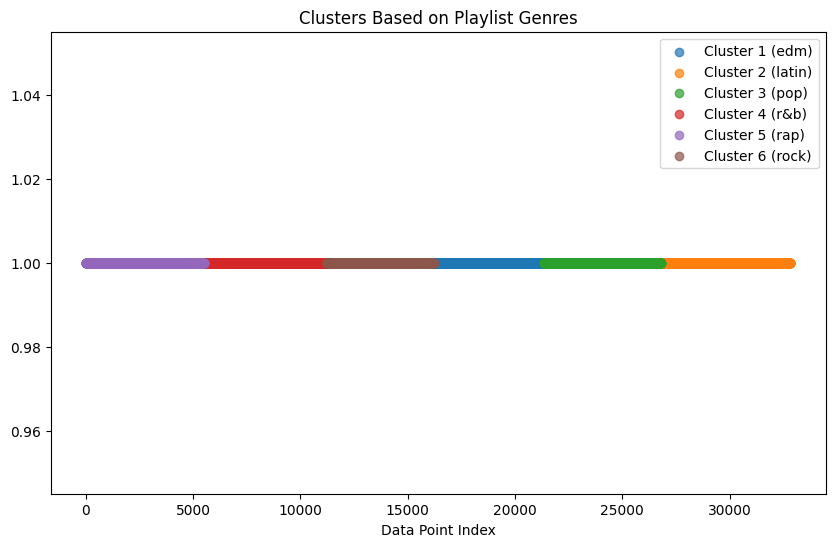

In [20]:
# Define cluster labels based on your analysis
cluster_labels = {
    0: 'edm',
    1: 'latin',
    2: 'pop',
    3: 'r&b',
    4: 'rap',
    5: 'rock'
}

# Add a new column 'cluster_name' to your DataFrame based on the cluster labels
df['cluster_name'] = df['cluster_label'].map(cluster_labels)

# Plot clusters based on playlist genres with cluster labels
plt.figure(figsize=(10, 6))
for cluster, label in cluster_labels.items():
    subset = df[df['cluster_label'] == cluster]
    plt.scatter(subset.index, [1] * len(subset), label=f'Cluster {cluster + 1} ({label})', alpha=0.7)
plt.title('Clusters Based on Playlist Genres')
plt.xlabel('Data Point Index')
plt.legend()
plt.show()


c:\Users\bazzu\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


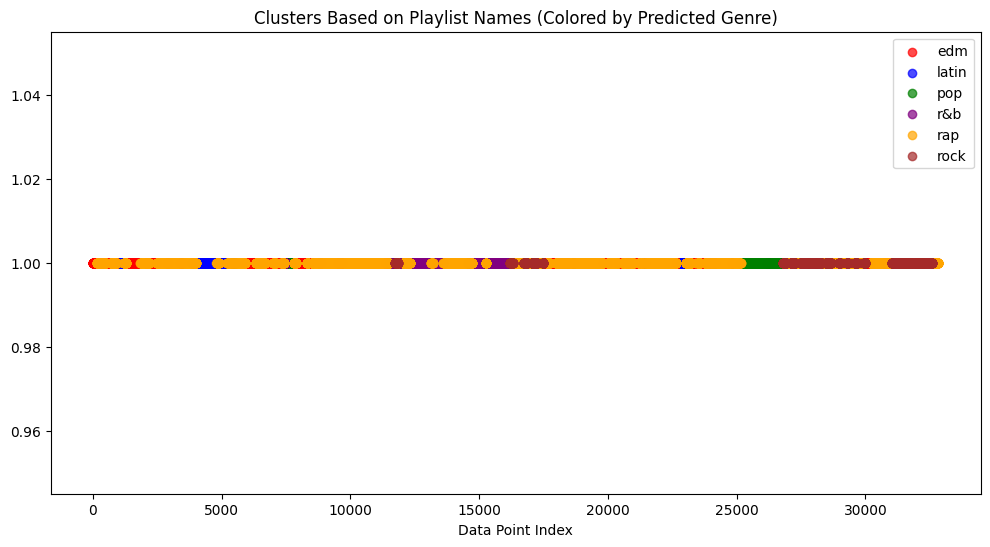

In [21]:



genre_colors = {
    'edm': 'red',
    'latin': 'blue',
    'pop': 'green',
    'r&b': 'purple',
    'rap': 'orange',
    'rock': 'brown'
}


tfidf_vectorizer = TfidfVectorizer(max_features=1000, stop_words='english')


X_tfidf = tfidf_vectorizer.fit_transform(df['playlist_name'])


num_clusters = len(genre_colors)


kmeans = KMeans(n_clusters=num_clusters)
kmeans.fit(X_tfidf)


df['predicted_genre'] = [list(genre_colors.keys())[i] for i in kmeans.labels_]


plt.figure(figsize=(12, 6))
for genre, color in genre_colors.items():
    subset = df[df['predicted_genre'] == genre]
    plt.scatter(subset.index, [1] * len(subset), label=f'{genre}', color=color, alpha=0.7)
plt.title('Clusters Based on Playlist Names (Colored by Predicted Genre)')
plt.xlabel('Data Point Index')
plt.legend()
plt.show()


In [22]:
print(df.columns)

Index(['track_id', 'track_name', 'track_artist', 'track_popularity',
       'track_album_id', 'track_album_name', 'track_album_release_date',
       'playlist_name', 'playlist_id', 'playlist_genre', 'playlist_subgenre',
       'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_ms', 'cluster', 'cluster_label', 'cluster_name',
       'predicted_genre'],
      dtype='object')


In [23]:
df = df.drop_duplicates(subset='track_id')

In [24]:
from sklearn.metrics.pairwise import cosine_similarity

# Select relevant feature columns for playlist similarity
playlist_feature_columns = ['danceability', 'energy', 'valence', 'tempo']

# Compute cosine similarity between playlists
playlist_similarity_matrix = cosine_similarity(df[playlist_feature_columns])


In [25]:
def playlist_recommendation(playlist_name, top_n=5):
    # Find the index of the selected playlist
    selected_index = df[df['playlist_name'] == playlist_name].index[0]
    
    # Get the similarity scores for the selected playlist
    playlist_similarity_scores = playlist_similarity_matrix[selected_index]
    
    # Get the indices of the most similar playlists
    similar_playlist_indices = playlist_similarity_scores.argsort()[::-1][1:top_n + 1]
    
    # Get the names of the recommended playlists
    recommended_playlists = df.iloc[similar_playlist_indices]['playlist_name'].values
    
    return recommended_playlists


In [26]:
# Example: Recommend playlists similar to a given playlist
selected_playlist_name = 'Dance Pop'
recommended_playlists = playlist_recommendation(selected_playlist_name, top_n=5)

# Display the recommended playlist names
print("Recommended Playlist Names:")
print(recommended_playlists)


Recommended Playlist Names:
['2020 Hits & 2019  Hits – Top Global Tracks 🔥🔥🔥' 'Indie Poptimism'
 'ELECTROPOP EN ESPAÑOL' 'Cardio' 'Indie Poptimism']
